In [1]:
import sys
import cv2
import re
import csv

from skimage.feature import peak_local_max

from skspatial.objects import Points, Plane
from skspatial.plotting import plot_3d

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

sys.path.append('..')

In [2]:
%matplotlib notebook
import math as m
import numpy as np
from scipy import ndimage
from scipy.optimize import lsq_linear

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [4]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_11_BC5/'.replace('\\', '/')

file = 'raw_02_1'


core = Core(folder, file)
core.downsample(5)
core.type = 'diff'
print(len(core))

99


In [24]:
folder = r'D:\SPRUP_data_Jenda\21_02_19_BC5/'.replace('\\', '/')

file = 'raw_04_3'
data = np.load(folder + 'saved_data/' + file + '.npy')
std = np.std(data[:, :, 50:])
inte = np.sum(data[:, :, 50:])

std*=1e5
print(std)
print(std*1)

print(inte)
print(inte*1)
print('='*10)

file = 'raw_05_3'
data = np.load(folder + 'saved_data/' + file + '.npy')
std = np.std(data[:, :, 200:])
inte = np.sum(data[:, :, 200:])

std*=1e5
print(std)
print(std*2)

print(inte)
print(inte*2)
print('='*10)

file = 'raw_06_3'
data = np.load(folder + 'saved_data/' + file + '.npy')
std = np.std(data[:, :, 50:])
inte = np.sum(data[:, :, 50:])

std*=1e5
print(std)
print(std*5)

print(inte)
print(inte*5)

125.75056567136991
125.75056567136991
-70.24342503351804
-70.24342503351804
63.9105019632942
127.8210039265884
-50.18742836460177
-100.37485672920354
25.88158364411863
129.40791822059316
-6.68112261638598
-33.4056130819299


In [6]:
f = 50

d =data[:,:,f]
print(data.shape)

(400, 272, 183)


<IPython.core.display.Javascript object>


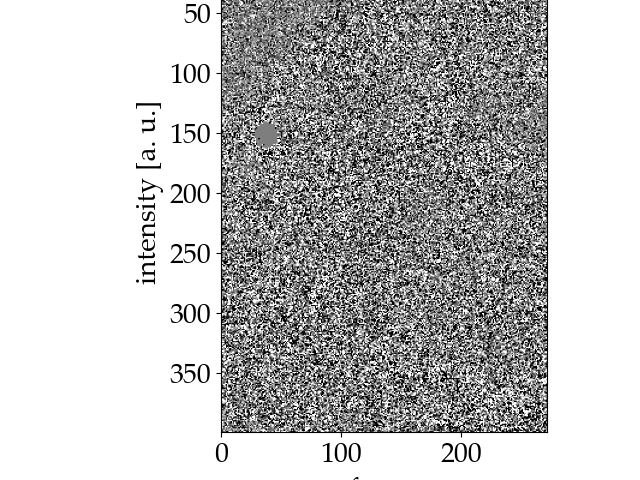

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')


axes.imshow(
    d,
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)

In [23]:
std = np.std(data[:, :, 50:])
inte = np.sum(data[:, :, 50:])

std*=1e5
print(std)
print(inte)

25.88158364411863
-6.68112261638598


125.75056567136991
-70.24342503351804


<IPython.core.display.Javascript object>


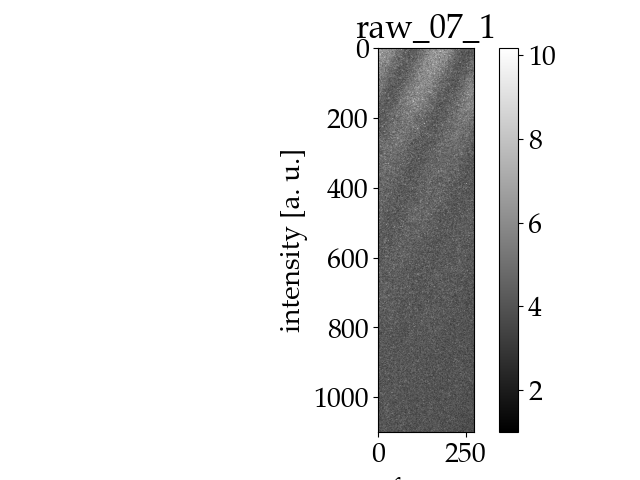

In [61]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')


img = axes.imshow(
    std,
    cmap='gray',
    zorder=0,
    vmin=np.min(std),
    vmax=np.max(std*0.6)
)
cb = fig.colorbar(img, ax=axes)

# fig.savefig('images/std_measurement_bs.png', dpi=300, bbox_inches='tight')    
# fig.savefig('images/std_direct_bs.png', dpi=300, bbox_inches='tight') 

In [68]:
for i in range(10):
    print('{}, {:.1f}: {:.2f}'.format(i/10, 1-i/10, i/10*(1-i/10)))

0.0, 1.0: 0.00
0.1, 0.9: 0.09
0.2, 0.8: 0.16
0.3, 0.7: 0.21
0.4, 0.6: 0.24
0.5, 0.5: 0.25
0.6, 0.4: 0.24
0.7, 0.3: 0.21
0.8, 0.2: 0.16
0.9, 0.1: 0.09
